<a href="https://colab.research.google.com/github/santhoshsrivi/BITS/blob/main/IDS_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?



--------------Type the answers below this line-------------- 
1) We are trying to build a model that classifies the voice call quality of various service providers in India.

2) A brief description about the customer feedback on call quality, network type provided by the respective operator,geographical indicators of the location of the reception of service will be required to solve the problem at hand.

3) We are using the data provided by the TRAI based on the Feedback Captured using TRAI MyCAll App. Customers rates their experience about voice call quality in real time and help TRAI gather customer experience data along with Network data. 

The API for fetching the data is described here: (https://data.gov.in/resources/voice-call-quality-customer-experiencemycall-app-march-2021/api)

4) The analytic task at hand will be classification where we will be building a model for segregating the call quality as satisfactory,poor voice quality and call dropped.

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc. 

(Data downloaded from website like Kaggle will be awarded negative marks.)

## 2.1 Code for scraping data from website



In [1]:
import requests,json
import numpy as np

res=requests.get('https://api.data.gov.in/resource/07d3496d-8933-4b97-b067-89d8ad7a04eb?api-key=579b464db66ec23bdd000001e4dc9e7f38ca486c5233cfd21692bfa6&format=json&offset=0&limit=1000')
response = json.loads(res.text)

## 2.2 Code for converting the above scraped data into a dataframe

In [2]:
import pandas as pd
from pandas import json_normalize

df1=json_normalize(response['records'])

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
df1.head(5)

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,10.303162,76.223051,Kerala
1,RJio,Travelling,4G,5,Satisfactory,26.727374,80.898619,Uttar Pradesh
2,RJio,Indoor,4G,4,Satisfactory,-1.000000,-1.000000,NA
3,Idea,Outdoor,4G,2,Poor Voice Quality,12.930553,77.617564,Karnataka
4,MTNL,Indoor,3G,3,Poor Voice Quality,19.155222,72.935275,Maharashtra


In [4]:
df1.tail(5)

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
995,Airtel,Indoor,4G,4,Satisfactory,24.088552,88.255137,West Bengal
996,Airtel,Indoor,Unknown,4,Satisfactory,24.088552,88.255137,West Bengal
997,Airtel,Indoor,4G,4,Satisfactory,24.088552,88.255137,West Bengal
998,Airtel,Indoor,4G,4,Satisfactory,24.088552,88.255137,West Bengal
999,RJio,Indoor,4G,4,Satisfactory,-1.000000,-1.000000,NA


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [5]:
df1.describe()

,rating,latitude,longitude
count,1000.000000,1000.000000,1000.000000
mean,3.969000,9.242564,37.742583
std,1.381285,11.126136,39.926874
min,1.000000,-1.000000,-1.000000
25%,4.000000,-1.000000,-1.000000
50%,4.000000,-1.000000,-1.000000
75%,5.000000,19.060281,76.404274
max,5.000000,30.768951,88.438204


In [6]:
df1.shape

(1000, 8)

## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?


# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [7]:
df1.calldrop_category.unique()

array(['Satisfactory', 'Poor Voice Quality', 'Call Dropped'], dtype=object)

In [8]:
df1.operator.unique()

array(['RJio', 'Idea', 'MTNL', 'Airtel', 'Vodafone', 'BSNL'], dtype=object)

In [9]:
df1.inout_travelling.unique()

array(['Indoor', 'Travelling', 'Outdoor'], dtype=object)

In [10]:
df1.network_type.unique()

array(['4G', '3G', 'Unknown', '2G'], dtype=object)

In [11]:
df1.rating.unique()

array([4, 5, 2, 3, 1])

In [ ]:
df1.state_name.unique()

array(['Kerala', 'Uttar Pradesh', 'NA', 'Karnataka', 'Maharashtra',
       'Rajasthan', 'Telangana', 'West Bengal', 'Haryana',
       'Andhra Pradesh', 'Jharkhand', 'Madhya Pradesh', 'Odisha',
       'Chhattisgarh', 'Tamil Nadu', 'Gujarat', 'Punjab', 'Delhi',
       'Uttarakhand'], dtype=object)

## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [12]:
##---------Type the code below this line------------------##
df1[df1.duplicated()]



#As per the output, we can see that last few rows have been duplicated

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
11,Idea,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NA
22,RJio,Outdoor,4G,4,Satisfactory,18.510783,73.853748,Maharashtra
31,Idea,Indoor,4G,5,Satisfactory,9.641868,76.578046,Kerala
35,Airtel,Indoor,2G,4,Satisfactory,24.088758,88.255632,West Bengal
39,RJio,Indoor,Unknown,1,Call Dropped,-1.000000,-1.000000,NA
...,...,...,...,...,...,...,...,...
995,Airtel,Indoor,4G,4,Satisfactory,24.088552,88.255137,West Bengal
996,Airtel,Indoor,Unknown,4,Satisfactory,24.088552,88.255137,West Bengal
997,Airtel,Indoor,4G,4,Satisfactory,24.088552,88.255137,West Bengal
998,Airtel,Indoor,4G,4,Satisfactory,24.088552,88.255137,West Bengal


In [13]:
df1.drop_duplicates(inplace=True)

In [14]:
df1[df1.duplicated()]

#Now as we can see , the results are blank and so all duplicate rows have been removed 

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name


In [15]:
df1.shape

#After removing the duplicates we see that there are only 397 rows

(397, 8)

## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [16]:
##---------Type the code below this line------------------##

#There are missing data in the columns "network_type" and "state_name" 
#where missing value in "network_type" is represented by Unknown and missing value in "state_name" 
#is represented by NA

print(df1.network_type.unique())

print(df1.state_name.unique())
#There is no missing data in any columns

['4G' '3G' 'Unknown' '2G']
['Kerala' 'Uttar Pradesh' 'NA' 'Karnataka' 'Maharashtra' 'Rajasthan'
 'Telangana' 'West Bengal' 'Haryana' 'Andhra Pradesh' 'Jharkhand'
 'Madhya Pradesh' 'Odisha' 'Chhattisgarh' 'Tamil Nadu' 'Gujarat' 'Punjab'
 'Delhi' 'Uttarakhand']


## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [17]:
#The mode of this column is 4G

df1['network_type'].value_counts()

4G         266
Unknown     69
3G          45
2G          17
Name: network_type, dtype: int64

In [18]:
#The mode of this column is maharashtra

df1['state_name'].value_counts()

Maharashtra       105
NA                 81
Uttar Pradesh      47
Kerala             31
West Bengal        27
Karnataka          23
Chhattisgarh       21
Andhra Pradesh     10
Rajasthan          10
Madhya Pradesh      9
Gujarat             8
Odisha              7
Jharkhand           5
Tamil Nadu          4
Haryana             3
Telangana           2
Delhi               2
Punjab              1
Uttarakhand         1
Name: state_name, dtype: int64

In [19]:
##---------Type the code below this line------------------##

#We are replacing the column missing values with mode of the data as obtained above

df1['network_type'] = df1['network_type'].replace(['Unknown'],'4G')
df1['state_name'] = df1['state_name'].replace(['NA'],'Maharashtra')

In [20]:
# We are going to verify if missing values are eliminated

print(df1.network_type.unique())

print(df1.state_name.unique())

['4G' '3G' '2G']
['Kerala' 'Uttar Pradesh' 'Maharashtra' 'Karnataka' 'Rajasthan'
 'Telangana' 'West Bengal' 'Haryana' 'Andhra Pradesh' 'Jharkhand'
 'Madhya Pradesh' 'Odisha' 'Chhattisgarh' 'Tamil Nadu' 'Gujarat' 'Punjab'
 'Delhi' 'Uttarakhand']


## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [21]:
##---------Type the code below this line------------------##
df1

#The inconsistencies here that there are some continous attributes and some discrete attributes. We plan to apply decision tree, 
#so all attributes must be discrete. So we are going to discretize the latitude and longitude attributes

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,10.303162,76.223051,Kerala
1,RJio,Travelling,4G,5,Satisfactory,26.727374,80.898619,Uttar Pradesh
2,RJio,Indoor,4G,4,Satisfactory,-1.000000,-1.000000,Maharashtra
3,Idea,Outdoor,4G,2,Poor Voice Quality,12.930553,77.617564,Karnataka
4,MTNL,Indoor,3G,3,Poor Voice Quality,19.155222,72.935275,Maharashtra
...,...,...,...,...,...,...,...,...
985,Vodafone,Indoor,4G,2,Poor Voice Quality,23.578263,87.179453,West Bengal
986,BSNL,Travelling,4G,5,Satisfactory,23.605407,87.165057,West Bengal
992,Vodafone,Indoor,4G,2,Poor Voice Quality,-1.000000,-1.000000,Maharashtra
993,Airtel,Indoor,4G,4,Satisfactory,24.088552,88.255137,West Bengal


## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [22]:
##---------Type the code below this line-----------------




df1['latitude']=pd.qcut(df1['latitude'],4)
df1['longitude']=pd.qcut(df1['longitude'],4)

In [23]:
df1

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,"(10.036, 18.499]","(75.896, 80.899]",Kerala
1,RJio,Travelling,4G,5,Satisfactory,"(22.895, 30.769]","(80.899, 88.438]",Uttar Pradesh
2,RJio,Indoor,4G,4,Satisfactory,"(-1.001, 10.036]","(-1.001, 72.863]",Maharashtra
3,Idea,Outdoor,4G,2,Poor Voice Quality,"(10.036, 18.499]","(75.896, 80.899]",Karnataka
4,MTNL,Indoor,3G,3,Poor Voice Quality,"(18.499, 22.895]","(72.863, 75.896]",Maharashtra
...,...,...,...,...,...,...,...,...
985,Vodafone,Indoor,4G,2,Poor Voice Quality,"(22.895, 30.769]","(80.899, 88.438]",West Bengal
986,BSNL,Travelling,4G,5,Satisfactory,"(22.895, 30.769]","(80.899, 88.438]",West Bengal
992,Vodafone,Indoor,4G,2,Poor Voice Quality,"(-1.001, 10.036]","(-1.001, 72.863]",Maharashtra
993,Airtel,Indoor,4G,4,Satisfactory,"(22.895, 30.769]","(80.899, 88.438]",West Bengal


## 3.7 Identify the target variables.


In [24]:
##---------Type the code below this line------------------##

df1['calldrop_category']

0            Satisfactory
1            Satisfactory
2            Satisfactory
3      Poor Voice Quality
4      Poor Voice Quality
              ...        
985    Poor Voice Quality
986          Satisfactory
992    Poor Voice Quality
993          Satisfactory
994          Satisfactory
Name: calldrop_category, Length: 397, dtype: object

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [25]:
##---------Type the code below this line------------------##
feature_cols = ['operator','inout_travelling','network_type','rating','latitude','longitude','state_name']
X=df1[feature_cols]
y=df1.calldrop_category

In [26]:
X

,operator,inout_travelling,network_type,rating,latitude,longitude,state_name
0,RJio,Indoor,4G,4,"(10.036, 18.499]","(75.896, 80.899]",Kerala
1,RJio,Travelling,4G,5,"(22.895, 30.769]","(80.899, 88.438]",Uttar Pradesh
2,RJio,Indoor,4G,4,"(-1.001, 10.036]","(-1.001, 72.863]",Maharashtra
3,Idea,Outdoor,4G,2,"(10.036, 18.499]","(75.896, 80.899]",Karnataka
4,MTNL,Indoor,3G,3,"(18.499, 22.895]","(72.863, 75.896]",Maharashtra
...,...,...,...,...,...,...,...
985,Vodafone,Indoor,4G,2,"(22.895, 30.769]","(80.899, 88.438]",West Bengal
986,BSNL,Travelling,4G,5,"(22.895, 30.769]","(80.899, 88.438]",West Bengal
992,Vodafone,Indoor,4G,2,"(-1.001, 10.036]","(-1.001, 72.863]",Maharashtra
993,Airtel,Indoor,4G,4,"(22.895, 30.769]","(80.899, 88.438]",West Bengal


In [27]:
y

0            Satisfactory
1            Satisfactory
2            Satisfactory
3      Poor Voice Quality
4      Poor Voice Quality
              ...        
985    Poor Voice Quality
986          Satisfactory
992    Poor Voice Quality
993          Satisfactory
994          Satisfactory
Name: calldrop_category, Length: 397, dtype: object



## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [28]:
##---------Type the code below this line------------------##

#Here we are going to you use decision tree so not required for one hot encoding

# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

In [29]:
##---------Type the code below this line------------------##

#All the attributes are discrete attributes, so scatter plot won't be applicable since scatter plot is only for continous attributes

## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


In [ ]:
##---------Type the code below this line------------------##
import seaborn as sns

#Pair plot not applicable because all attributes are discrete and pair plot is insightful for numeric data

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable. 


In [ ]:
##---------Type the code below this line------------------##

#regression plots not applicable because all attributes are discrete and pair plot is insightful for numeric data

## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.


In [ ]:
##---------Type the code below this line------------------##

#We will use all the available features for classification . Decision trees also work for non linear separable 
#data so this particular task is not helpful

# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

In [ ]:
##---------Type the code below this line------------------##

#Heat map not applicable because all attributes are discrete and pair plot is insightful for numeric data

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>) 

Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

In [30]:
def compute_impurity(feature, impurity_criterion):
    probs = feature.value_counts(normalize=True)
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))

In [31]:
def comp_metric(df, target, descriptive_feature, split_criterion):       
    target_entropy = compute_impurity(df[target], split_criterion)
    entropy_list = list()
    weight_list = list()
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))
    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    metric = target_entropy - feature_remaining_impurity
    return(metric)

In [32]:
##---------Type the code below this line------------------##

split_criterion = 'entropy'
information_gain_dict={}
for feature in df1.drop(columns='calldrop_category').columns:
    feature_gain = comp_metric(df1, 'calldrop_category', feature, split_criterion)
    information_gain_dict[feature]=feature_gain
    
marklist = sorted(information_gain_dict.items(), key=lambda x:x[1],reverse=True)
sortdict = dict(marklist)
print(sortdict)  
    
#As per information gain hence the top 5 features are rating, State_name, Longitude, Operator, Latitude

{'rating': 0.770399, 'state_name': 0.19865499999999991, 'longitude': 0.06498799999999993, 'operator': 0.05309800000000009, 'latitude': 0.03833399999999987, 'inout_travelling': 0.015209999999999724, 'network_type': 0.0066109999999999225}


In [33]:

split_criterion = 'gini'
gini_dict={}
for feature in df1.drop(columns='calldrop_category').columns:
    feature_gain = comp_metric(df1, 'calldrop_category', feature, split_criterion)
    gini_dict[feature]=feature_gain
    
marklist = sorted(gini_dict.items(), key=lambda x:x[1],reverse=True)
sortdict = dict(marklist)
print(sortdict)  
    
#As per gini index hence the top 5 features are rating, State_name, Longitude, Operator, Latitude

{'rating': 0.277242, 'state_name': 0.062373999999999985, 'longitude': 0.026637999999999995, 'operator': 0.022877000000000036, 'latitude': 0.015175999999999967, 'inout_travelling': 0.005617999999999956, 'network_type': 0.001637000000000055}


In [34]:
ratio_dict={}
for feature in df1.drop(columns='calldrop_category').columns:
    feature_gain = comp_metric(df1, 'calldrop_category', feature, split_criterion)
    ratio_dict[feature]=feature_gain/compute_impurity(df1[feature],'entropy')
    
marklist = sorted(ratio_dict.items(), key=lambda x:x[1],reverse=True)
sortdict = dict(marklist)
print(sortdict)  

#As per gain ratio hence the top 5 features are rating, State_name, Longitude, Operator, Latitude

{'rating': 0.14217538461538462, 'state_name': 0.022134137686302336, 'longitude': 0.013318999999999998, 'operator': 0.010450890817725005, 'latitude': 0.007587999999999984, 'inout_travelling': 0.003923184357541869, 'network_type': 0.002162483487450535}


## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

In [35]:
##---------Type the code below this line------------------##
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X[['operator']]=X[['operator']].apply(lambda col:pd.Categorical(col).codes)
X[['inout_travelling']]=X[['inout_travelling']].apply(lambda col:pd.Categorical(col).codes)
X[['network_type']]=X[['network_type']].apply(lambda col:pd.Categorical(col).codes)
X[['latitude']]=X[['latitude']].apply(lambda col:pd.Categorical(col).codes)
X[['longitude']]=X[['longitude']].apply(lambda col:pd.Categorical(col).codes)
X[['state_name']]=X[['state_name']].apply(lambda col:pd.Categorical(col).codes)
y=y.to_frame()
y[['calldrop_category']]=y[['calldrop_category']].apply(lambda col:pd.Categorical(col).codes)
y=y.squeeze()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)


lf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=100, min_samples_leaf=2)   
lf_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


DecisionTreeClassifier(max_depth=100, min_samples_leaf=2, random_state=42)

operator            0.079775
inout_travelling    0.046003
network_type        0.013946
rating              0.811056
latitude            0.018793
longitude           0.021948
state_name          0.008480
dtype: float64


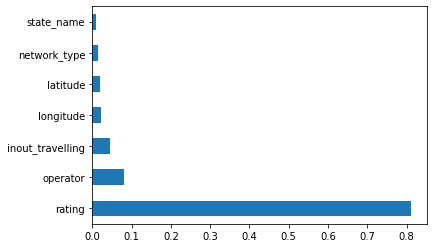

In [36]:
#The below graph shows the feature importance

feat_importances = pd.Series(lf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
print(feat_importances)

In [37]:
y_predict = lf_model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.8166666666666667

In [39]:
#!pip install graphviz

In [40]:
#conda install python-graphviz

In [41]:
import matplotlib.pyplot as plt
from sklearn import tree

In [42]:
#below is the decision tree representation in the form of text

text_representation = tree.export_text(lf_model)
print(text_representation)

|--- feature_3 <= 3.50
|   |--- feature_3 <= 2.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_5 <= 2.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |--- feature_0 <= 1.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  1.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |

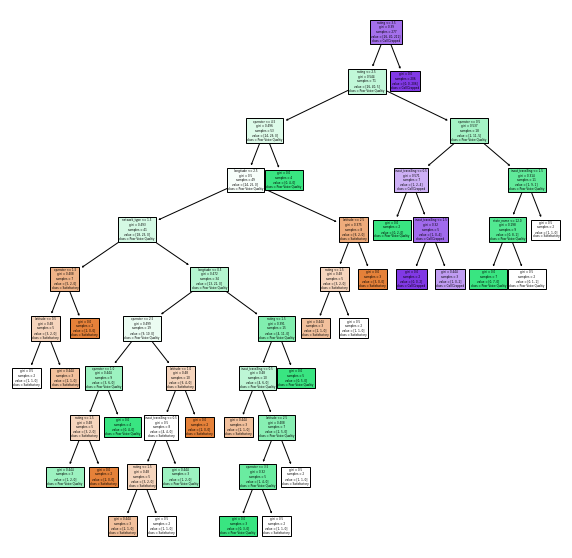

In [47]:
#below is the decision tree plotted using matplotlib library

target = list(df1['calldrop_category'].unique())
feature_names = list(X.columns)

fig = plt.figure(figsize = (10,10))

decision_tree= tree.plot_tree(lf_model, feature_names=feature_names,class_names=target,filled=True)

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [ ]:
pip install mlxtend

In [ ]:
##---------Type the code below this line------------------##
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

ModuleNotFoundError: ignored

In [ ]:
sfs_model = sfs(lf_model,k_features=5,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

sfs_model = sfs_model.fit(X_train,y_train)

In [ ]:
#feat_cols = list(sfs_model.k_feature_idx_)
sfs_model.subsets_
#feat_cols = list(sfs_model.k_feature_idx_)
#print(feat_cols)

{1: {'feature_idx': (3,),
  'cv_scores': array([0.89285714, 0.78571429, 0.85454545, 0.85454545, 0.90909091]),
  'avg_score': 0.8593506493506494,
  'feature_names': ('rating',)},
 2: {'feature_idx': (0, 3),
  'cv_scores': array([0.875     , 0.89285714, 0.87272727, 0.89090909, 0.90909091]),
  'avg_score': 0.8881168831168831,
  'feature_names': ('operator', 'rating')},
 3: {'feature_idx': (0, 3, 5),
  'cv_scores': array([0.875     , 0.83928571, 0.89090909, 0.90909091, 0.90909091]),
  'avg_score': 0.8846753246753247,
  'feature_names': ('operator', 'rating', 'longitude')},
 4: {'feature_idx': (0, 3, 4, 5),
  'cv_scores': array([0.875     , 0.85714286, 0.90909091, 0.90909091, 0.90909091]),
  'avg_score': 0.8918831168831168,
  'feature_names': ('operator', 'rating', 'latitude', 'longitude')},
 5: {'feature_idx': (0, 2, 3, 4, 5),
  'cv_scores': array([0.875     , 0.85714286, 0.92727273, 0.89090909, 0.90909091]),
  'avg_score': 0.8918831168831168,
  'feature_names': ('operator',
   'network_ty

## 5.5 Conclude the top 3 significant features with necessary justifications.

--------------Type the answers below this line-------------
